### Import das dependências

In [1]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Importar os datasets

In [2]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)


### Verificar qualidade dos dados

In [3]:
# Verificar duplicados
duplicates = merged_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [5]:
# Estatísticas sumarizadas
merged_df.describe()

,Ano,Mês,Energia Ativa (kWh),CPEs_Doméstico,CPEs_Iluminação Pública,CPEs_Não Doméstico,CPEs_Outros,CPEs_Mobilidade_Eletrica_Não,CPEs_Mobilidade_Eletrica_Sim
count,9790.000000,9790.000000,9.790000e+03,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000
mean,2022.777528,7.167926,6.698904e+06,9437.674055,107.457508,2176.664760,64.922983,13562.938815,4.675996
std,0.532665,3.624244,1.301081e+07,22853.667206,174.274733,5290.937589,159.619755,22955.528565,12.331074
min,2022.000000,1.000000,1.899000e+03,0.000000,0.000000,5.000000,0.000000,572.000000,0.000000
25%,2022.000000,4.000000,8.817195e+05,0.000000,0.000000,52.000000,0.000000,3063.000000,1.000000
50%,2023.000000,8.000000,2.290926e+06,1289.500000,15.000000,428.000000,5.000000,5692.500000,1.000000
75%,2023.000000,10.000000,6.572700e+06,8943.000000,141.000000,2000.000000,55.000000,14888.000000,3.000000
max,2024.000000,12.000000,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,264079.000000,191.000000


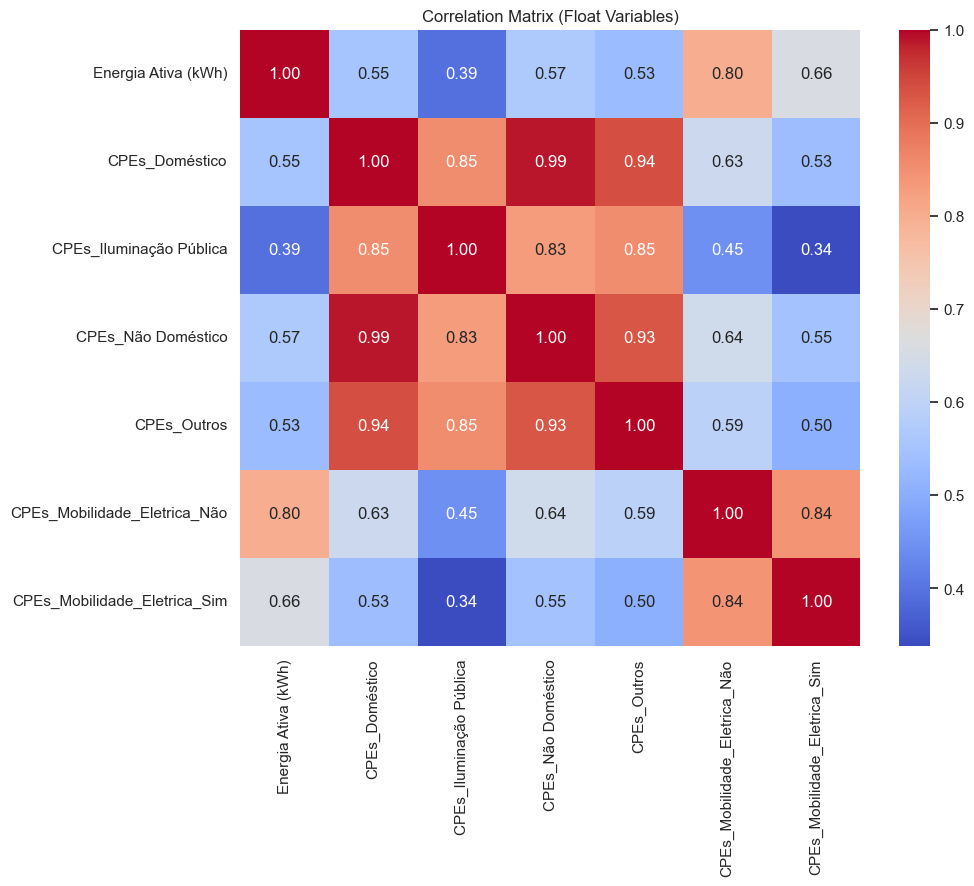

In [7]:
# Selecionar só as variaveis númericas
numeric_columns = merged_df.select_dtypes(include=['float64']).columns

# Matriz de correlação
correlation_matrix_float = merged_df[numeric_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_float, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Float Variables)')
plt.show()


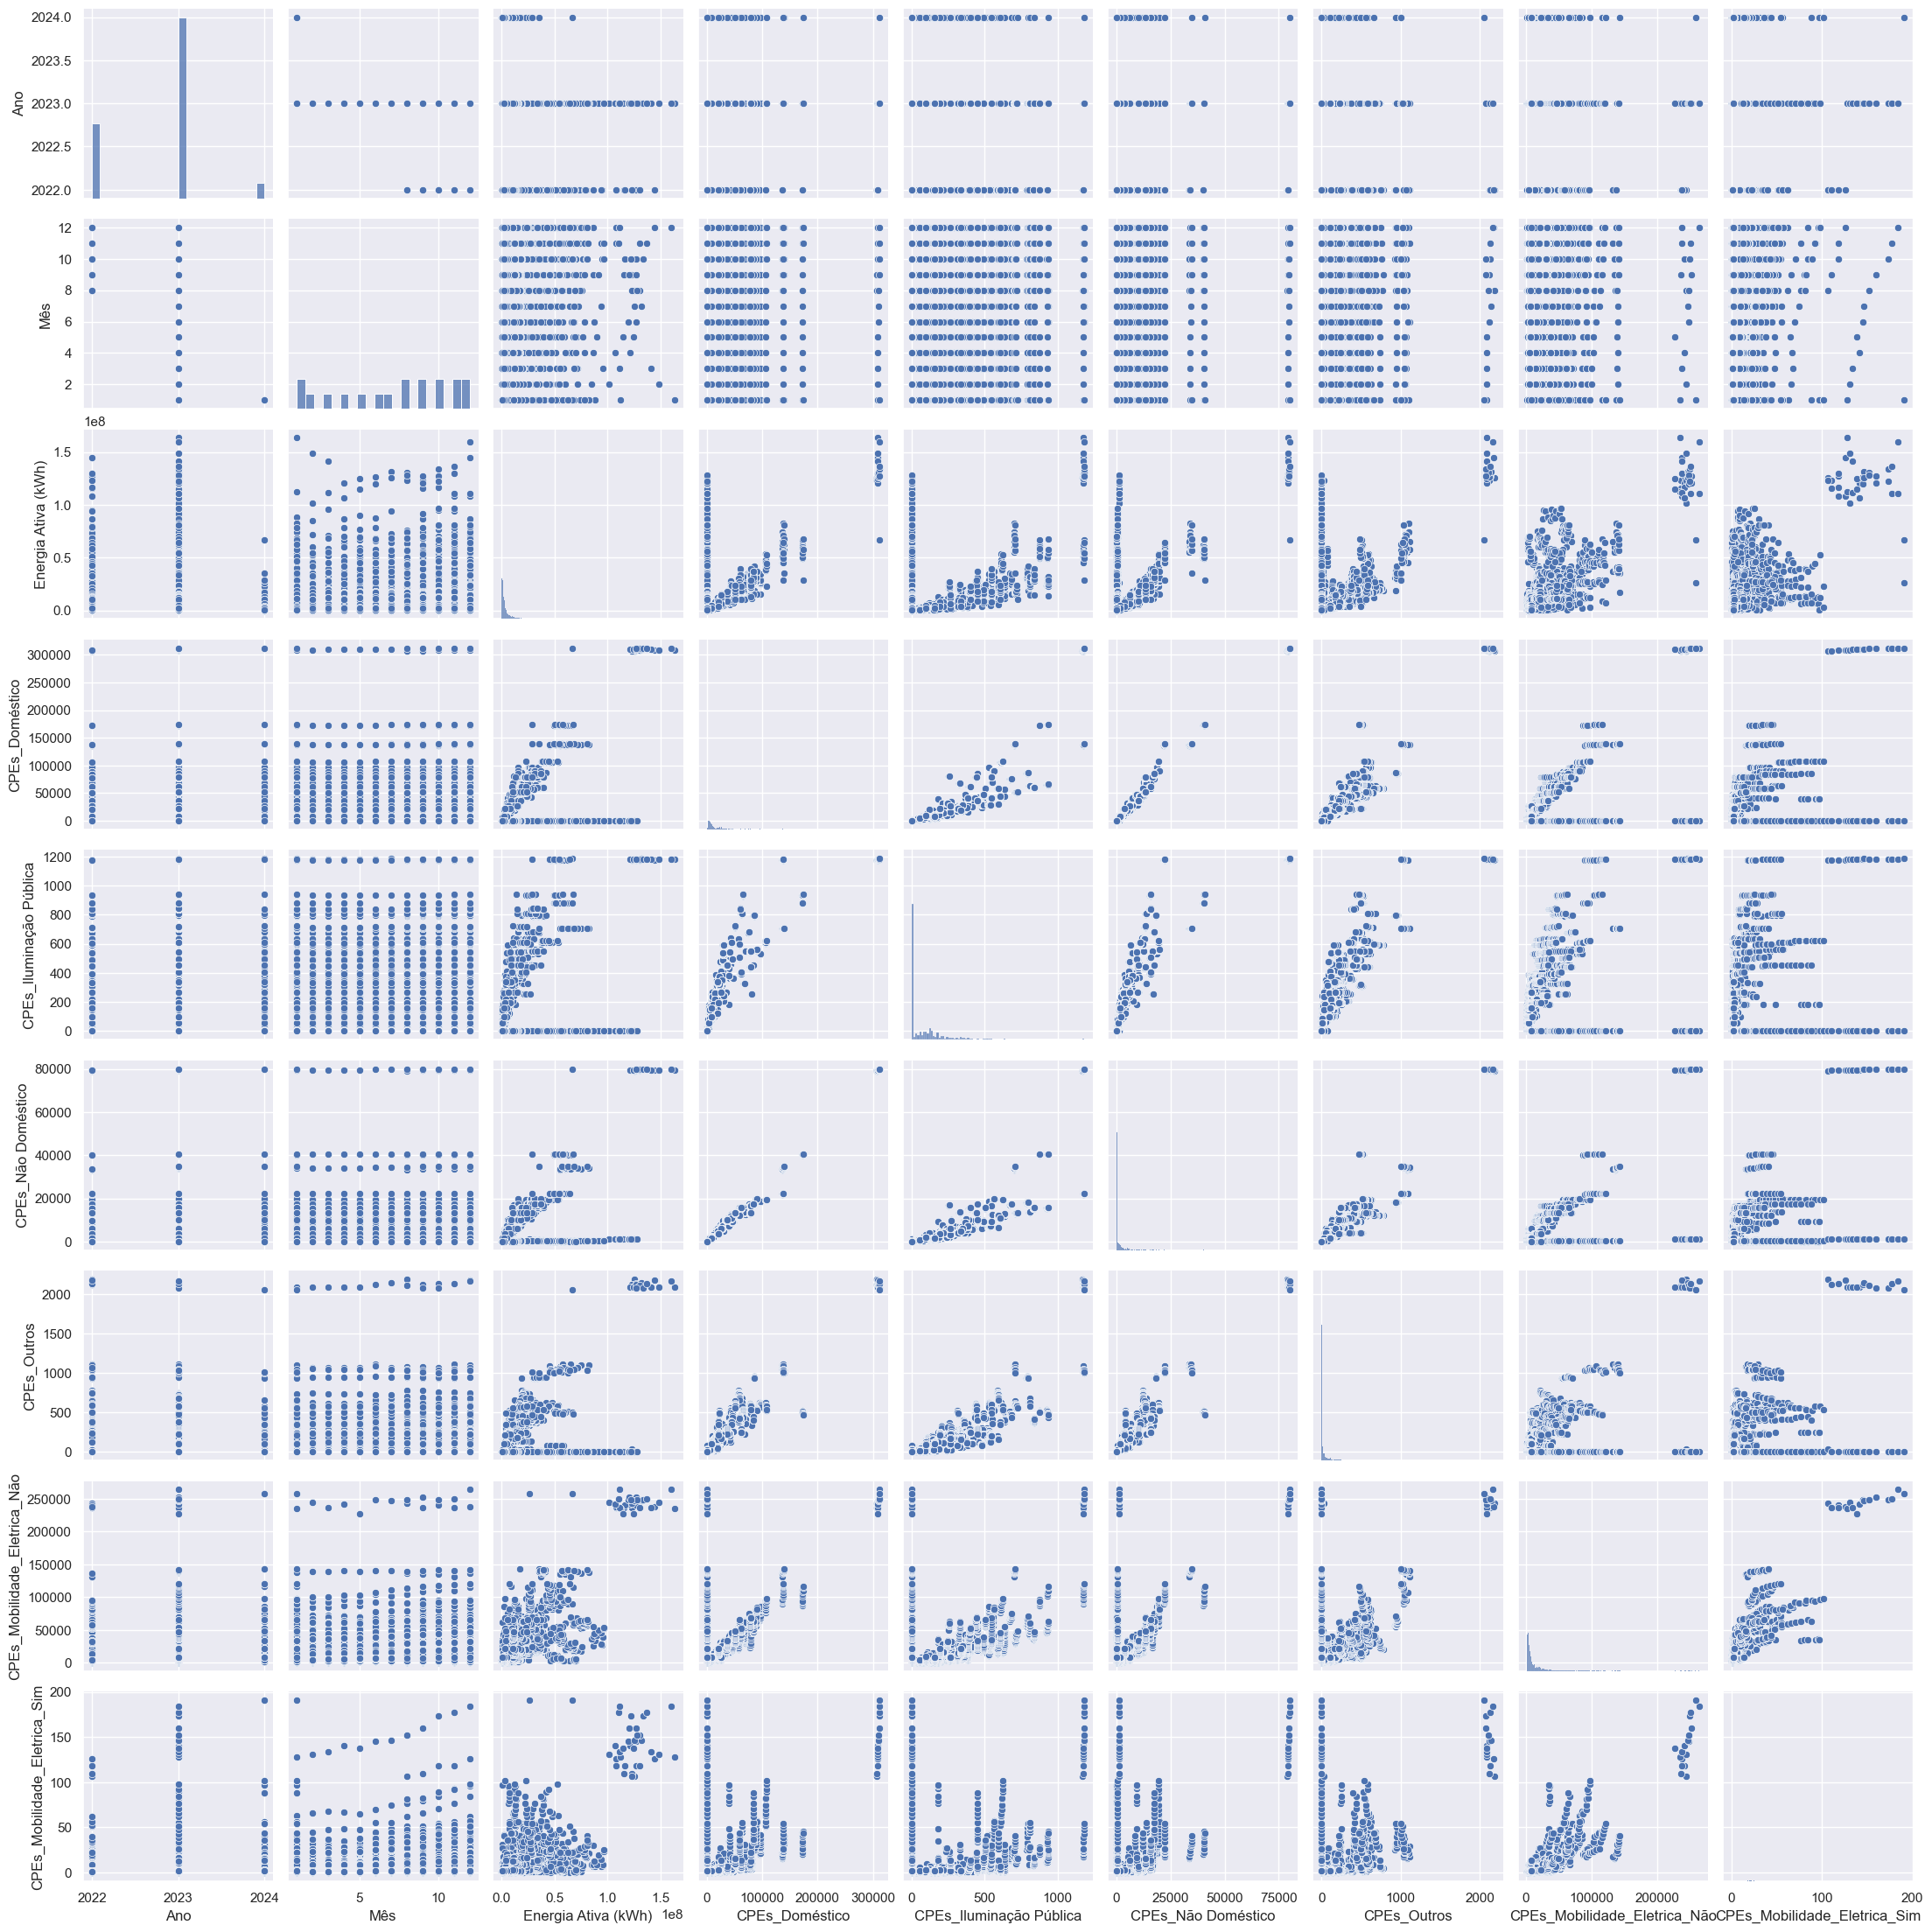

In [8]:
# Pairplot
sns.pairplot(merged_df)
plt.show()

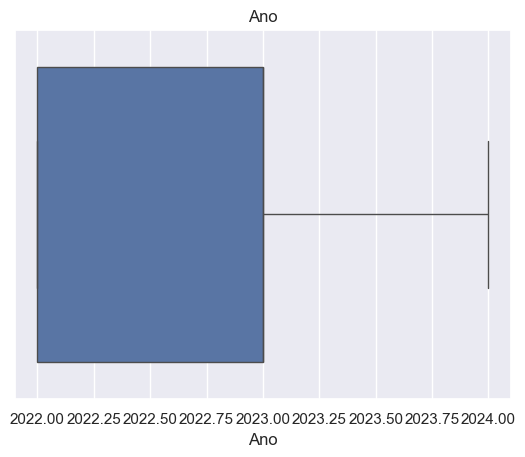

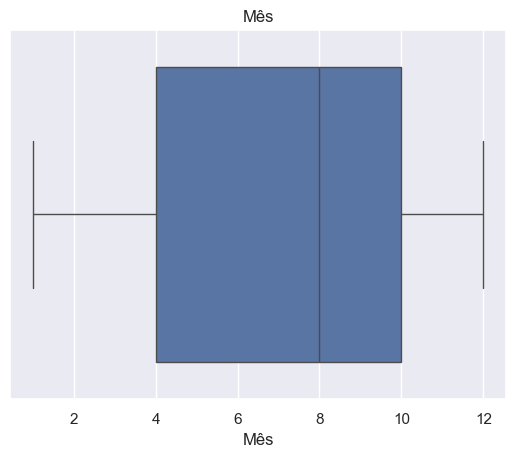

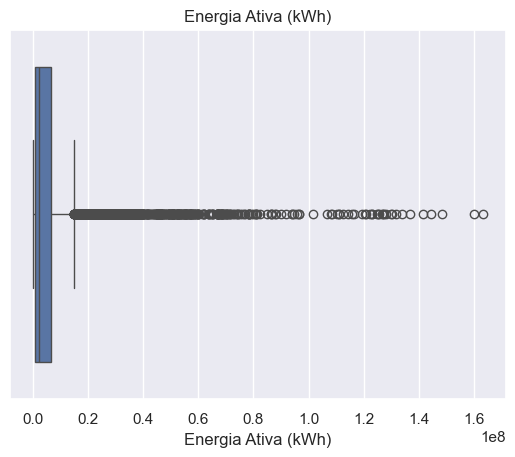

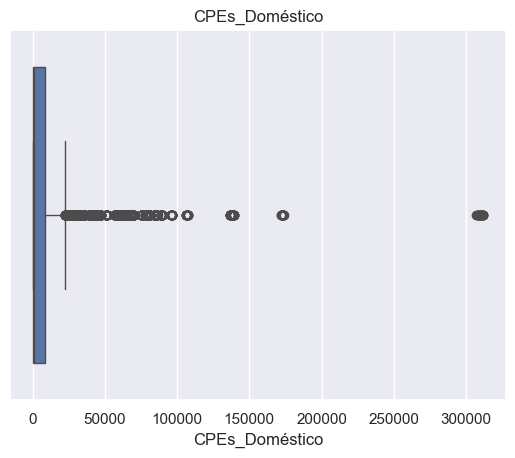

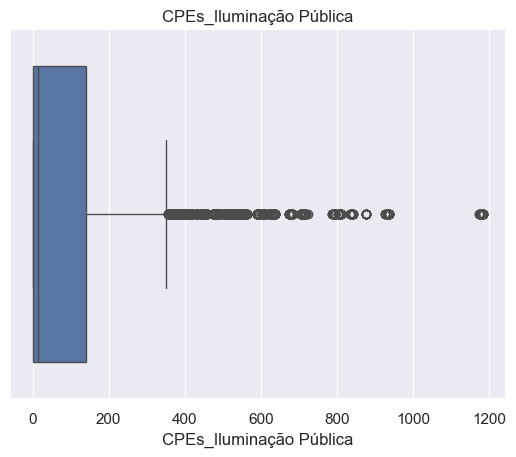

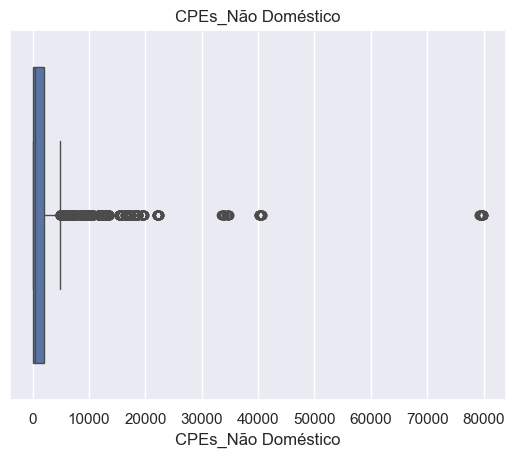

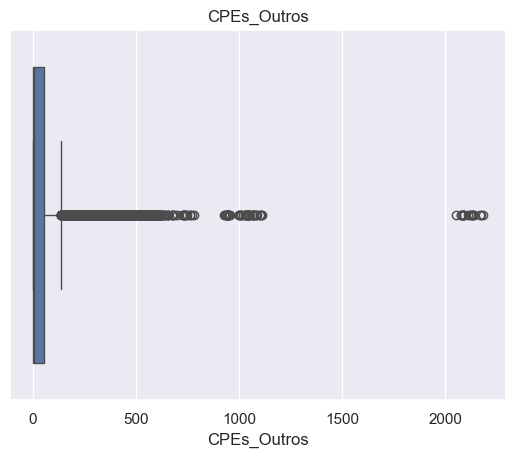

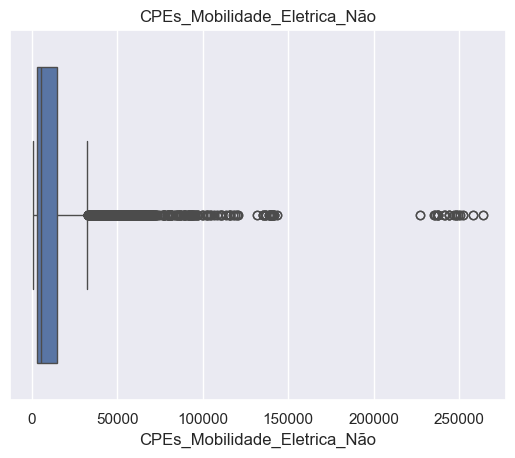

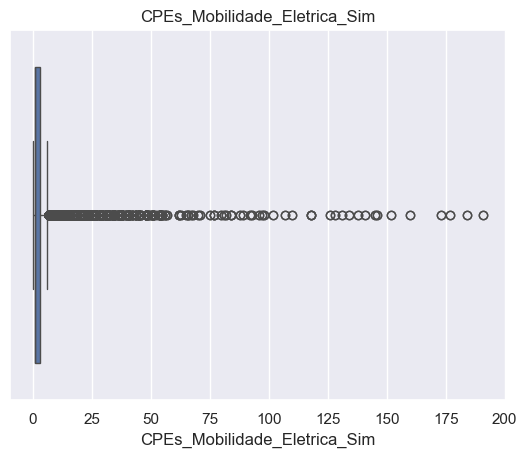

In [9]:
# Boxplots for numeric variables
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    sns.boxplot(x=merged_df[column])
    plt.title(column)
    plt.show()


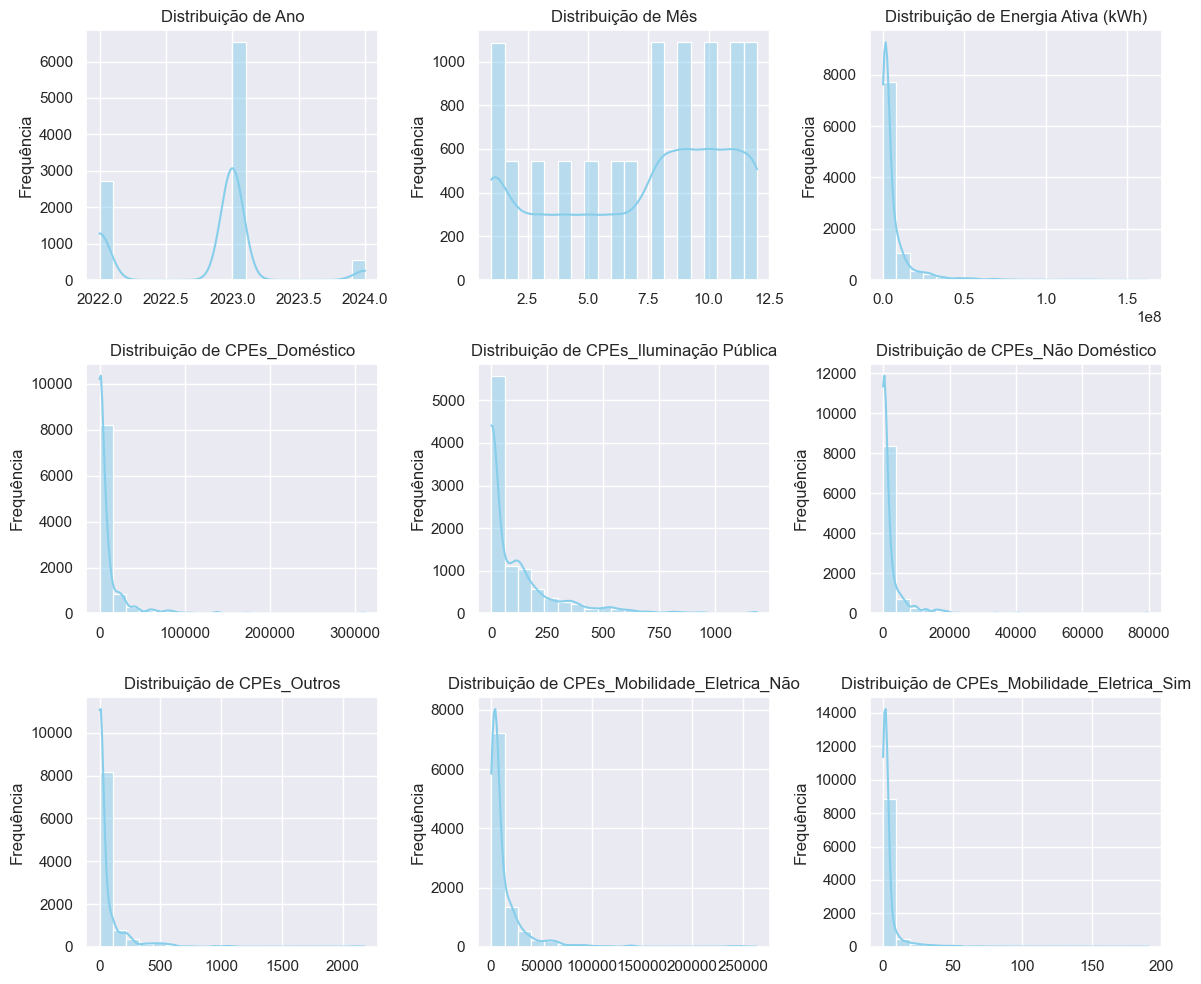

In [11]:
# Plot histograms for each float variable
plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(merged_df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {column}')
    plt.xlabel('')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()
